In [204]:
import numpy as np
import pandas as pd
# import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%load_ext autoreload
#%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
df = pd.read_csv('p2-arbres-fr.csv', delimiter = ';')
# df

In [4]:
if 'type_emplacement' in df.columns:
    df.drop(columns=['type_emplacement', 'numero'], inplace=True)
    # debatable
    df = df.dropna(subset=['domanialite'])
    df.drop(columns=['complement_addresse'], inplace=True)
    df.remarquable = df.remarquable.apply(lambda x : 1 if x == 1 else 0)
    df.variete = df.variete.fillna('Manquante')
    df['variete'] = df['variete'].apply(lambda x: x[:-1] if x.endswith("'") else x)
    
    
    hauteur_reccord = 31
    circonference_reccord = 700

    df_sans_outlier_hauteur = df.loc[df.hauteur_m <= hauteur_reccord, :]
    df_sans_outlier = df_sans_outlier_hauteur.loc[df_sans_outlier_hauteur.circonference_cm <= circonference_reccord, :]
    df_sans_outlier.head()

In [5]:
df.nunique()

id                     200136
domanialite                 9
arrondissement             25
lieu                     6921
id_emplacement          69040
libelle_francais          192
genre                     175
espece                    539
variete                   437
circonference_cm          531
hauteur_m                 143
stade_developpement         4
remarquable                 2
geo_point_2d_a         200106
geo_point_2d_b         200113
dtype: int64

In [131]:
#keeps 5th percentile of values
filtered_df = df[df['genre'].map(df['genre'].value_counts()) > df['genre'].value_counts().quantile(0.8)]
# df.isna().sum()
filtered_df.genre.value_counts()

Platanus             42591
Aesculus             25341
Tilia                21550
Acer                 18471
Sophora              11830
Prunus                7053
Fraxinus              6014
Pinus                 4861
Celtis                4276
Pyrus                 3928
Quercus               3887
Carpinus              3495
Corylus               3463
Populus               3352
Robinia               2317
Betula                2262
Ulmus                 2133
Taxus                 2018
Malus                 1955
Fagus                 1929
Paulownia             1415
Gleditsia             1413
Chamaecyparis         1219
Magnolia              1133
Juglans               1132
Liriodendron          1129
Toona                 1071
Cercis                1019
Pterocarya            1000
Ailanthus              956
Ginkgo                 940
Cedrus                 911
Liquidambar            701
x Cupressocyparis      680
Morus                  679
Name: genre, dtype: int64

In [97]:
df.domanialite.value_counts()

Alignement      104949
Jardin           46262
CIMETIERE        31926
DASCO             6422
PERIPHERIQUE      5327
DJS               3900
DFPE              1325
DAC                 21
DASES                4
Name: domanialite, dtype: int64

In [6]:
df.isna().sum()[df.isna().sum()!=0]

libelle_francais        1497
genre                     16
espece                  1752
stade_developpement    67205
dtype: int64

In [ ]:
df.remarquable.value_counts()

In [ ]:
df.shape[0] == df.espece.value_counts().sum()


In [9]:
df['espece'][df.variete == "Atropunicea'"].value_counts()

sylvatica    102
Name: espece, dtype: int64

In [7]:
df[df.espece=='hippocastanum'].stade_developpement.value_counts()

A     9864
JA    2888
J     1709
M     1367
Name: stade_developpement, dtype: int64

In [8]:
df.isna().sum()

id                         0
domanialite                0
arrondissement             0
lieu                       0
id_emplacement             0
libelle_francais        1497
genre                     16
espece                  1752
variete                    0
circonference_cm           0
hauteur_m                  0
stade_developpement    67205
remarquable                0
geo_point_2d_a             0
geo_point_2d_b             0
dtype: int64

In [10]:
df[df.variete != "Manquante"]

,id,domanialite,arrondissement,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
11,99885,Jardin,PARIS 16E ARRDT,JARDIN DU RANELAGH,20001,Hêtre,Fagus,sylvatica,Atropunicea,30,0,NaN,0,48.858222,2.269287
25,99900,Jardin,PARIS 16E ARRDT,JARDIN DU RANELAGH,20021,Hêtre,Fagus,sylvatica,Atropunicea,100,0,NaN,0,48.857849,2.267720
26,99901,Jardin,PARIS 16E ARRDT,JARDIN DU RANELAGH,20022,Hêtre,Fagus,sylvatica,Atropunicea,35,0,NaN,0,48.857803,2.267476
27,99902,Jardin,PARIS 16E ARRDT,JARDIN DU RANELAGH,20023,Hêtre,Fagus,sylvatica,Atropunicea,185,0,NaN,0,48.857809,2.267599
28,99903,Jardin,PARIS 16E ARRDT,JARDIN DU RANELAGH,20024,Hêtre,Fagus,sylvatica,Atropunicea,130,0,NaN,0,48.857790,2.267713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198835,2023213,DJS,PARIS 19E ARRDT,CENTRE SPORTIF JULES LADOUMEGUE / 35 ROUTE DES...,109002,Saule,Salix,babylonica,Tortuosa,20,5,NaN,0,48.890661,2.397392
198866,2023360,Alignement,PARIS 1ER ARRDT,RUE DE TURBIGO,402001,Fevier,Gleditsia,triacanthos,Skyline,20,5,NaN,0,48.863689,2.348325
198867,2023361,Alignement,PARIS 1ER ARRDT,RUE DE TURBIGO,402002,Fevier,Gleditsia,triacanthos,Skyline,20,5,NaN,0,48.863716,2.348449
198868,2023362,Alignement,PARIS 1ER ARRDT,RUE DE TURBIGO,402003,Fevier,Gleditsia,triacanthos,Skyline,20,5,NaN,0,48.863744,2.348573


In [11]:
np.round(df.genre.value_counts().sum())/10

20012.0

In [12]:
df.genre.value_counts().mean()

1143.5485714285714

In [14]:
# <ods-dataset-context context="lesarbresplantes" lesarbresplantes-dataset="les-arbres-plantes" lesarbresplantes-parameters="{'geofilter.polygon':'(48.88639177703194,2.228851318359375),(48.812289858662574,2.230224609375),(48.7874140472094,2.349700927734375),(48.82268881260476,2.4863433837890625),(48.94054322456003,2.4217987060546875),(48.88639177703194,2.228851318359375)'}">
#     <ods-map no-refit="true" scroll-wheel-zoom="false" display-control="true" search-box="true" toolbar-fullscreen="true" toolbar-geolocation="true" basemap="jawg.streets" location="13,48.89886,2.34249">
#         <ods-map-layer-group>
#             <ods-map-layer context="lesarbresplantes" color="#C32D1C" picto="ods-circle" show-marker="true" display="auto" shape-opacity="0.5" point-opacity="1" border-color="#FFFFFF" border-opacity="1" border-size="1" border-pattern="solid" caption="true" title="Les arbres plantés" description="Jeu de données géographique
#     présentant les arbres plantés (hors peuplement forestiers)" size="4" size-min="3" size-max="5" size-function="linear"></ods-map-layer>
#         </ods-map-layer-group>
#     </ods-map>

# </ods-dataset-context>

In [12]:
df['variete'].dropna().apply(lambda x: isinstance(x, float)).value_counts()


False    200136
Name: variete, dtype: int64

In [16]:
df.genre.value_counts()[df.genre.value_counts()<3].count()

39

In [17]:
df[['genre' , 'espece']][df['genre']=='Taxus'].value_counts()

genre  espece          
Taxus  baccata             1991
       n. sp.                 7
       alba                   4
       x media                2
       baccata f. Aurea       1
dtype: int64

In [18]:
df.espece.value_counts()

x hispanica                  36409
hippocastanum                20039
japonica                     11822
n. sp.                        9063
tomentosa                     8962
                             ...  
polycarpa                        1
x gondouinii                     1
lusitanica subsp.azorica         1
oliveri                          1
delavayi subsp. potaninii        1
Name: espece, Length: 539, dtype: int64

In [19]:
df[['genre' , 'espece']][df['genre']=='Taxus']['espece'].value_counts()

baccata             1991
n. sp.                 7
alba                   4
x media                2
baccata f. Aurea       1
Name: espece, dtype: int64

In [20]:
df.espece.value_counts().index

Index(['x hispanica', 'hippocastanum', 'japonica', 'n. sp.', 'tomentosa',
       'pseudoplatanus', 'platanoides', 'nigra', 'x europaea', 'x carnea',
       ...
       'x chinensis', 'minor var. vulgaris', 'x macrantha', 'acerifolius',
       'horizontalis', 'polycarpa', 'x gondouinii', 'lusitanica subsp.azorica',
       'oliveri', 'delavayi subsp. potaninii'],
      dtype='object', length=539)

In [42]:
df[df.genre == 'Liriodendron'].genre.value_counts()

Liriodendron    1129
Name: genre, dtype: int64

In [36]:
g

'Liriodendron'

In [13]:
df.espece = df.espece.apply(lambda x : df.genre[df.genre == g].value_counts().index[0])

NameError: name 'g' is not defined

In [20]:
df.domanialite.value_counts()

Alignement      104949
Jardin           46262
CIMETIERE        31926
DASCO             6422
PERIPHERIQUE      5327
DJS               3900
DFPE              1325
DAC                 21
DASES                4
Name: domanialite, dtype: int64

In [160]:
df.domanialite.value_counts()

Alignement      104949
Jardin           46262
CIMETIERE        31926
DASCO             6422
PERIPHERIQUE      5327
DJS               3900
DFPE              1325
DAC                 21
DASES                4
Name: domanialite, dtype: int64

In [186]:
df.groupby(['genre', 'genre'])['domanialite'].max()['Abelia']['Abelia']

'Jardin'

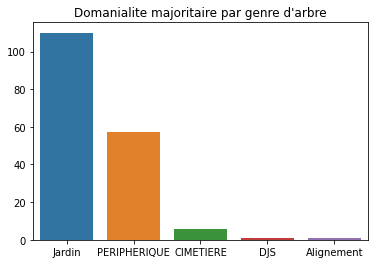

In [219]:
max_values_dict = {genre: max_value for genre, max_value in df.groupby('genre')['domanialite'].max().items()}
top_dom_per_genre = pd.DataFrame(max_values_dict.items(), columns = ['genre', 'domanialite']).domanialite.value_counts()
sns.barplot(x=top_dom_per_genre.index, y=top_dom_per_genre.values)
plt.title("Domanialite majoritaire par genre d'arbre")
plt.show()

Il est surprenant que voir que certains types d'abres ne sont pas

In [226]:
df[df.loc[:,'domanialite'] == 'Alignement']

,id,domanialite,arrondissement,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
7724,109411,Alignement,PARIS 1ER ARRDT,RUE RAMBUTEAU,1001003,Catalpa,Catalpa,bignonioides,Manquante,20,5,NaN,0,48.863124,2.345790
7725,109412,Alignement,PARIS 1ER ARRDT,RUE RAMBUTEAU,1001002,Catalpa,Catalpa,bignonioides,Manquante,140,10,A,0,48.863105,2.345876
7726,109413,Alignement,PARIS 1ER ARRDT,RUE RAMBUTEAU,1001001,Catalpa,Catalpa,bignonioides,Manquante,20,5,NaN,0,48.863150,2.345930
7921,109659,Alignement,PARIS 1ER ARRDT,RUE DE TURBIGO,202001,Erable,Acer,n. sp.,Manquante,65,10,NaN,0,48.863289,2.346738
7922,109660,Alignement,PARIS 1ER ARRDT,RUE DE TURBIGO,202002,Erable,Acer,n. sp.,Manquante,70,5,A,0,48.863305,2.346805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198874,2023464,Alignement,PARIS 20E ARRDT,RUE DU GENERAL NIESSEL,202002,Chêne,Quercus,cerris,Manquante,20,5,NaN,0,48.848074,2.409116
198875,2023465,Alignement,PARIS 20E ARRDT,RUE DU GENERAL NIESSEL,202003,Chêne,Quercus,cerris,Manquante,20,5,NaN,0,48.848226,2.409147
198876,2023466,Alignement,PARIS 20E ARRDT,RUE DU GENERAL NIESSEL,202004,Chêne,Quercus,cerris,Manquante,20,5,NaN,0,48.848379,2.409179
198877,2023467,Alignement,PARIS 20E ARRDT,RUE DU GENERAL NIESSEL,202005,Chêne,Quercus,cerris,Manquante,20,5,NaN,0,48.848533,2.409209


In [220]:
# max_values_dict = {genre: max_value for genre, max_value in df.groupby('espece')['domanialite'].max().items()}
# top_dom_per_espece = pd.DataFrame(max_values_dict.items(), columns = ['espece', 'domanialite']).domanialite.value_counts()
# sns.barplot(x=top_dom_per_espece.index, y=top_dom_per_espece.values)
# plt.title("Domanialite majoritaire par espece d'arbre")
# plt.show()

In [127]:
remarquable_per_genre_df

genre
Platanus          32
Fagus             12
Quercus           11
Aesculus          10
Cedrus             8
Ginkgo             8
Corylus            7
Pterocarya         7
Acer               6
Diospyros          6
Sequoiadendron     5
Name: remarquable, dtype: int64

Taux d\'arbre remarquable pour les 10 genres d\'arbres les plus plantés dans Paris

In [138]:
remarquable_per_genre_df = df.groupby(['genre'])['remarquable'].sum().sort_values(ascending=False)
remarquable_per_genre_df = remarquable_per_genre_df[remarquable_per_genre_df>=5]
temp_serie = df[df['genre'].isin(remarquable_per_genre_df[remarquable_per_genre_df > 0].index)]\
.genre.value_counts().sort_values(ascending=False)
print('Taux d\'arbre remarquable pour les 10 genres d\'arbres les plus plantés dans Paris')

percentage_remarquable_df = pd.DataFrame(remarquable_per_genre_df.div(temp_serie)*100, columns = ['%'],\
             index=temp_serie.sort_values(ascending=False).index).head(10)
percentage_remarquable_df["nombre d'arbre par genre"] = temp_serie
percentage_remarquable_df["nombre d'arbre remarquable par genre"] = remarquable_per_genre_df

percentage_remarquable_df


Taux d'arbre remarquable pour les 10 genres d'arbres les plus plantés dans Paris


,%,nombre d'arbre remarquable par genre
Platanus,0.075133,32
Aesculus,0.039462,10
Acer,0.032483,6
Quercus,0.282995,11
Corylus,0.202137,7
Fagus,0.622084,12
Pterocarya,0.700000,7
Ginkgo,0.851064,8
Cedrus,0.878156,8
Diospyros,4.000000,6


L'échantillon étant très faible, le maximum d'arbre remarquable par genre d'arbre étant 32 platanes, si on veut maximiser les chances de produires des arbres remarquable à Paris il peut être intéressant de planter l'un de ces genres d'abres qui ne sont pas des cas isolés (au moins 5 instances d'arbre remarquable recensés).


On ne peut pas se contenter de dire qu'il faut planter un maximum de Diospyros pour maximiser ces chances, les Platanus, les Quercus et les Fagus semblent semblent être préférable car l'échantillon d'arbre de ces genres présent à Paris est important et ils sont qualifiés de remarquables à une fréquence intéressante.

In [141]:
df.head(5)

,id,domanialite,arrondissement,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,Manquante,20,5,NaN,0,48.857620,2.320962
1,99875,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,Manquante,65,8,A,0,48.857656,2.321031
2,99876,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,Manquante,90,10,A,0,48.857705,2.321061
3,99877,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,Manquante,60,8,A,0,48.857722,2.321006
4,99878,Jardin,PARIS 17E ARRDT,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,Manquante,38,0,NaN,0,48.890435,2.315289


In [73]:
temp_serie['Eucommia']

7

Acer               0.032483
Aesculus           0.039462
Catalpa            0.676819
Cedrus             0.878156
Celtis             0.070159
Corylus            0.202137
Diospyros          4.000000
Fagus              0.622084
Ginkgo             0.851064
Liriodendron       0.354296
Magnolia           0.264784
Melia              2.255639
Pinus              0.082288
Platanus           0.075133
Pterocarya         0.700000
Quercus            0.282995
Sequoiadendron     8.064516
Taxodium          11.538462
Taxus              0.198216
Ulmus              0.140647
Zelkova            1.156069
dtype: float64

In [119]:
remarquable_percentage_df = pd.DataFrame({remarquable_per_genre_df : remarquable_per_genre_df.div(temp_serie)*100})

TypeError: unhashable type: 'Series'

2. ***Pistes à suivre***

In [48]:
# df.id_emplacement.value_counts()
# Creuser 'Manquante'


4. ***DUMP***

In [80]:
for g in df.genre.value_counts().index:
    if df[['genre' , 'espece']][df['genre']== g]['espece'].nunique() == 1:
        df.loc[df['genre'] == g, 'espece'] = df.loc[df['genre'] == g, 'espece'].iloc[0]
#         df.espece = df.espece.apply(lambda x : df.genre[df.genre == g].value_counts()[0])


# fonctionne mais ne retire qu'une espece